Vidhi Ladhabhai Shiyani
-- Project 2

In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=faa5360176cdeea0698c571c608d906eb4b26a40e5d4694ac689ba0e6acce807
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 37.3 MB/s eta 0:00:00


In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Profiling libraries
from ydata_profiling import ProfileReport

import sweetviz as sv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/telco-customer-churn.csv")
print("Initial Data Overview:")
print(df.info())
print("\nInitial Data Description:")
print(df.describe())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

In [ ]:
# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Check for missing value, Null, NaN records. Find Outliers. Transform all data to numeric.

In [ ]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
pd.isna(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


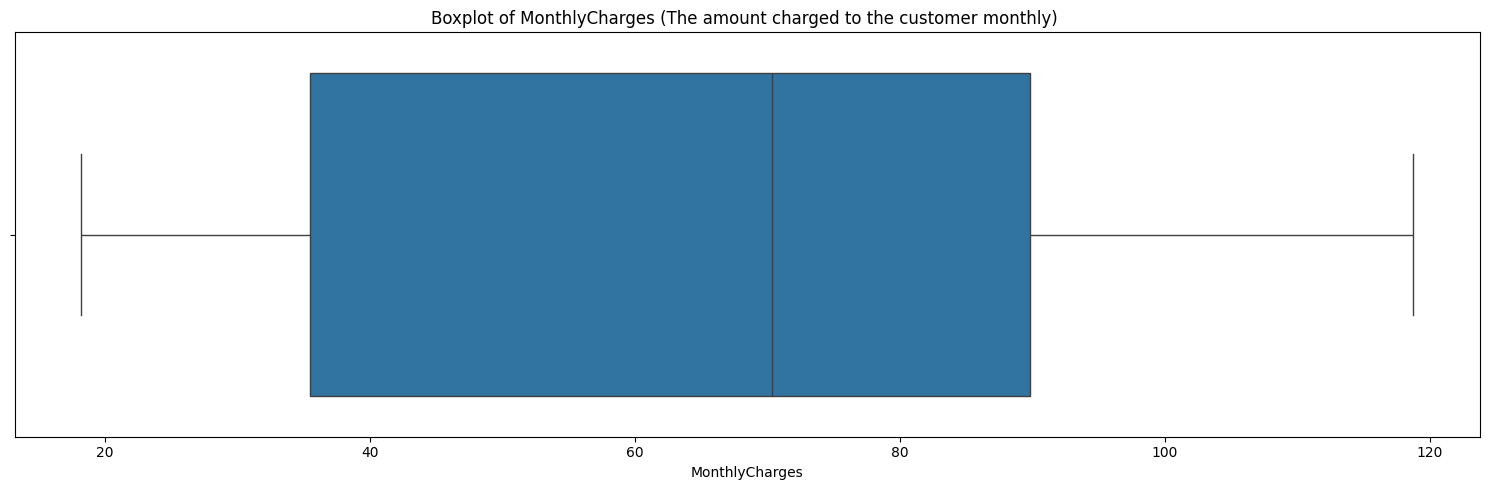

In [ ]:
# lets check for outlier

# Creating boxplots to detect outliers
plt.figure(figsize=(15, 5))  # Set the figure size for better readability

sns.boxplot(data=df, x=df['MonthlyCharges'])  # Boxplot for each feature
plt.title(f'Boxplot of MonthlyCharges (The amount charged to the customer monthly) ')  # Adding a title for clarity

plt.tight_layout()  # Adjust subplots to fit the figure area nicely

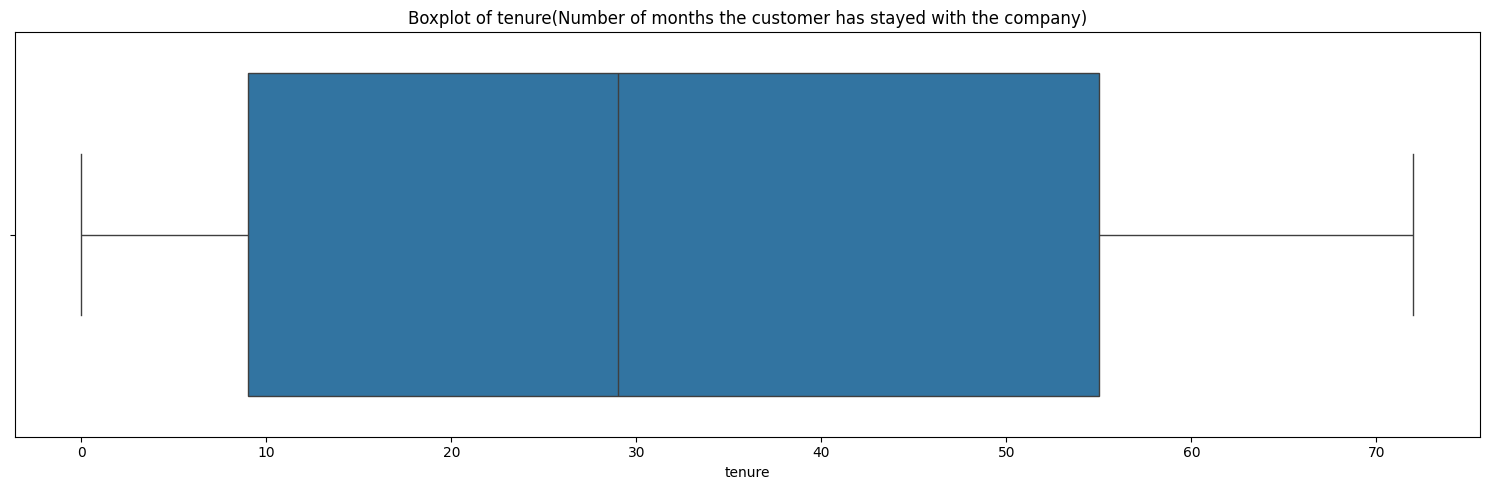

In [ ]:
plt.figure(figsize=(15, 5))  # Set the figure size for better readability

sns.boxplot(data=df, x=df['tenure'])  # Boxplot for each feature
plt.title(f'Boxplot of tenure(Number of months the customer has stayed with the company)')  # Adding a title for clarity

plt.tight_layout()  # Adjust subplots to fit the figure area nicely

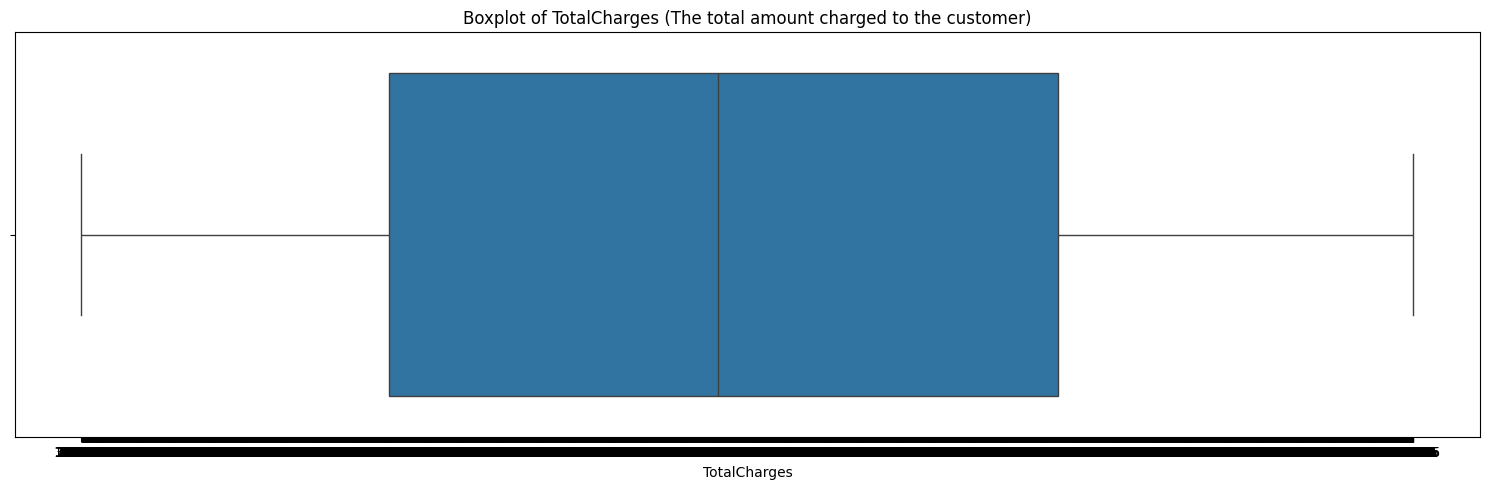

In [ ]:
plt.figure(figsize=(15, 5))  # Set the figure size for better readability

sns.boxplot(data=df, x=df['TotalCharges'])  # Boxplot for each feature
plt.title(f'Boxplot of TotalCharges (The total amount charged to the customer)')  # Adding a title for clarity

plt.tight_layout()  # Adjust subplots to fit the figure area nicely

In [ ]:
# List the types of data before transformation
print("Data Types Before Transformation:")
print(df.dtypes)

Data Types Before Transformation:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')

In [ ]:
df_numeric.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
# getting unique values from each column, so we know which values to convert to numerical
for col in df.columns:
    print(col,df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [ ]:
for col in df.columns:
    df.loc[df[col] == "No", col] = 0
    df.loc[df[col] == "Yes", col] = 1
    df.loc[df[col] == "Female", col] = 0
    df.loc[df[col] == "Male", col] = 1
    df.loc[df[col] == "No phone service", col] = 2
    df.loc[df[col] == "No internet service", col] = 3
    df.loc[df[col] == "DSL", col] = 4
    df.loc[df[col] == "Fiber optic", col] = 5
    df.loc[df[col] == "Month-to-month", col] = 6
    df.loc[df[col] == "One year", col] = 7
    df.loc[df[col] == "Two year", col] = 8
    df.loc[df[col] == "Electronic check", col] = 9
    df.loc[df[col] == "Mailed check", col] = 10
    df.loc[df[col] == "Bank transfer (automatic)", col] = 11
    df.loc[df[col] == "Credit card (automatic)", col] = 12
    df.loc[df[col] == " ", col] = -1

In [ ]:
# checking the unique values of our dataframe
for col in df.columns:
    print(col,df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines [2 0 1]
InternetService [4 5 0]
OnlineSecurity [0 1 3]
OnlineBackup [1 0 3]
DeviceProtection [0 1 3]
TechSupport [0 1 3]
StreamingTV [0 1 3]
StreamingMovies [0 1 3]
Contract [6 7 8]
PaperlessBilling [1 0]
PaymentMethod [9 10 11 12]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn [0 1]


In [ ]:
cols_to_convert_to_int = df.columns[np.where(df.dtypes=="object")]
cols_to_convert_to_int = cols_to_convert_to_int[1:] # we are not conserding the customerID col because it has all the unique values

# converting columns to integer type
for col in cols_to_convert_to_int:
    df[col] = pd.to_numeric(df[col])

In [ ]:
print("Altered datatypes:\n")
df.dtypes

Altered datatypes:



,0
customerID,object
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64


In [ ]:
# getting correlation matrix of matrix
df = df.drop(columns=['customerID']) #Droping this column because it contains string values and its not that important
corr = df.corr()
corr.style.background_gradient('coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,-0.008049,-0.000214,0.000788,0.005642,0.002805,0.002992,0.002082,0.000126,-0.011754,-0.005209,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.221726,-0.208709,-0.170002,-0.172926,-0.217566,-0.155266,-0.149000,-0.142554,0.156530,-0.093704,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000447,0.056157,0.059540,0.064584,0.047420,0.054605,0.051632,0.294806,-0.014877,0.133115,0.096848,0.317503,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.162042,0.179614,0.161106,0.157003,0.173036,0.146505,0.136652,0.243187,-0.111377,0.123844,-0.113890,0.062077,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.038429,0.085500,0.107643,0.107656,0.084902,0.078087,0.081169,0.671607,0.006152,0.340305,0.247900,0.826179,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,-0.072469,0.146522,0.164540,0.156631,0.145215,0.179510,0.175257,0.002247,0.016505,-0.004070,0.247398,0.113214,0.011942
MultipleLines,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.271593,-0.271502,-0.256501,-0.249718,-0.269655,-0.252334,-0.247970,0.078613,0.108230,0.030659,0.146153,0.250628,0.019423
InternetService,-0.008049,0.221726,-0.000447,-0.162042,0.038429,-0.072469,0.271593,1.000000,-0.924873,-0.900154,-0.899107,-0.923553,-0.880101,-0.880663,-0.272358,0.358198,-0.146894,0.854477,0.413442,0.273831
OnlineSecurity,-0.000214,-0.208709,0.056157,0.179614,0.085500,0.146522,-0.271502,-0.924873,1.000000,0.884432,0.883200,0.902492,0.861988,0.863460,0.352177,-0.341703,0.187499,-0.694378,-0.238097,-0.307989
OnlineBackup,0.000788,-0.170002,0.059540,0.161106,0.107643,0.164540,-0.256501,-0.900154,0.884432,1.000000,0.879558,0.885567,0.870863,0.869091,0.326757,-0.294559,0.166860,-0.642246,-0.194062,-0.280770


<Axes: >

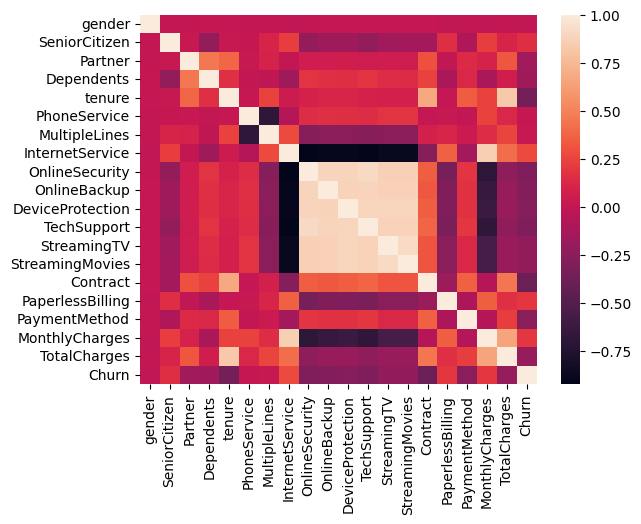

In [ ]:
sns.heatmap(corr)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Churn', axis=1)
y = df['Churn']

model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_

print(feature_importances)

[0.02795673 0.02129165 0.02277047 0.020036   0.15350827 0.00435893
 0.02284992 0.03436388 0.04491579 0.02401669 0.02249088 0.03646615
 0.01911299 0.02087196 0.07523245 0.02516216 0.05875576 0.17309097
 0.19274834]


In [ ]:
from sklearn.model_selection import train_test_split
from sweetviz import compare

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

compare(X_train, X_test).show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report = compare([X_train, "Training Data"], [X_test, "Test Data"])

# Generate the HTML report
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Data Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])


scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents'])

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_0,gender_1,Partner_0,Partner_1,Dependents_0,Dependents_1
0,0,-1.277445,0,2,4,0,1,0,0,0,0,6,1,9,-1.160323,-0.992609,0,True,False,False,True,True,False
1,0,0.066327,1,0,4,1,0,1,0,0,0,7,0,10,-0.259629,-0.172164,0,False,True,True,False,True,False
2,0,-1.236724,1,0,4,1,1,0,0,0,0,6,1,10,-0.362660,-0.958065,1,False,True,True,False,True,False
3,0,0.514251,0,2,4,1,0,1,1,0,0,7,0,11,-0.746535,-0.193672,0,False,True,True,False,True,False
4,0,-1.236724,1,0,5,0,0,0,0,0,0,6,1,9,0.197365,-0.938873,1,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,1,1,4,1,0,1,1,1,1,7,1,10,0.665992,-0.127604,0,False,True,False,True,False,True
7039,0,1.613701,1,1,5,0,1,1,0,1,1,7,1,12,1.277533,2.242605,0,True,False,False,True,False,True
7040,0,-0.870241,0,2,4,1,0,0,0,0,0,6,1,9,-1.168632,-0.852931,0,True,False,False,True,False,True
7041,1,-1.155283,1,1,5,0,0,0,0,0,0,6,1,10,0.320338,-0.870512,1,False,True,False,True,True,False


Addressing data imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

we are applying various models

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

naive_bayes = GaussianNB()
logistic_regression = LogisticRegression(max_iter=1000, solver='saga')
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()
xgboost = XGBClassifier()

naive bayes

In [ ]:
# Train and evaluate Naive Bayes
y_pred_naive_bayes = naive_bayes.fit(X_train, y_train).predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes)
f1_naive_bayes = f1_score(y_test,y_pred_naive_bayes)


print("--- Naive Bayes ---")
print(f"Accuracy: {accuracy_naive_bayes:.4f}")
print(f"Precision: {precision_naive_bayes:.4f}")
print(f"Recall: {recall_naive_bayes:.4f}")
print(f"F1-Score: {f1_naive_bayes:.4f}")
print()

--- Naive Bayes ---
Accuracy: 0.7570
Precision: 0.7068
Recall: 0.8894
F1-Score: 0.7877



Logistic regression

In [ ]:
# Train and evaluate Logistic Regression
y_pred_logistic_regression = logistic_regression.fit(X_train, y_train).predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)


print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy_logistic_regression:.4f}")
print(f"Precision: {precision_logistic_regression:.4f}")
print(f"Recall: {recall_logistic_regression:.4f}")
print(f"F1-Score: {f1_logistic_regression:.4f}")
print()

--- Logistic Regression ---
Accuracy: 0.7899
Precision: 0.7656
Recall: 0.8437
F1-Score: 0.8027



Random Forest

In [ ]:
# Train and evaluate Random Forest
y_pred_random_forest = random_forest.fit(X_train, y_train).predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
print("--- Random Forests ---")
print(f"Accuracy: {accuracy_random_forest:.4f}")
print(f"Precision: {precision_random_forest:.4f}")
print(f"Recall: {recall_random_forest:.4f}")
print(f"F1-Score: {f1_random_forest:.4f}")
print()

--- Random Forests ---
Accuracy: 0.8517
Precision: 0.8379
Recall: 0.8770
F1-Score: 0.8570



XG-Boost

In [ ]:
# Train and evaluate XGBoost
y_pred_xgboost = xgboost.fit(X_train, y_train).predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)
f1_xgboost = f1_score(y_test, y_pred_xgboost)

print("--- XGBoost ---")
print(f"Accuracy: {accuracy_xgboost:.4f}")
print(f"Precision: {precision_xgboost:.4f}")
print(f"Recall: {recall_xgboost:.4f}")
print(f"F1-Score: {f1_xgboost:.4f}")

--- XGBoost ---
Accuracy: 0.8348
Precision: 0.8217
Recall: 0.8608
F1-Score: 0.8408


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint # Import randint from scipy.stats

# Parameter distribution (ranges instead of fixed values)
param_dist = {
    'n_estimators': randint(50, 200),  # Now using randint from scipy.stats to define a distribution
    'max_depth': randint(3, 10),        # Same here
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

rf_classifier = RandomForestClassifier()

rand_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy')

rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)

best_rf_classifier = rand_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", accuracy)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 174}
Best Parameters: 0.8236714975845411
